In [6]:
from canny import canny_thres_image, get_image
from otsu import otsu_thresh_image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def detect_hold(image):
    print(f'Segmenting image {image}')
    canny = canny_thres_image(image)
    otsu_image = get_image(image)
    otsu = otsu_thresh_image(otsu_image)
    
    height, width = otsu.shape[:2]
    image = cv2.imread(image)
    for i_x in range(width): 
        for i_y in range(height): 
            # compare ostu[i_y, i_x] with canny[i_y, i_x]
            # print('otsu', otsu[i_y, i_x])
            # print('canny', canny[i_y, i_x])
            if np.array_equal(canny[i_y, i_x], [0, 255, 0]):
                image[i_y, i_x] = (0, 255, 0)
            elif np.array_equal(otsu[i_y, i_x], [0, 0, 0]):
                image[i_y, i_x] = (255, 0, 0)
    return image

/Users/JakeWu-Chen/miniconda3/envs/torch/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Volumes/LaCie/AI-project
/Volumes/LaCie/AI-project
File exists: True
Segmenting image data/V0/1.jpg
/Volumes/LaCie
/Volumes/LaCie
File exists: False


[ WARN:0@246.183] global loadsave.cpp:241 findDecoder imread_('./data/V1/1.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

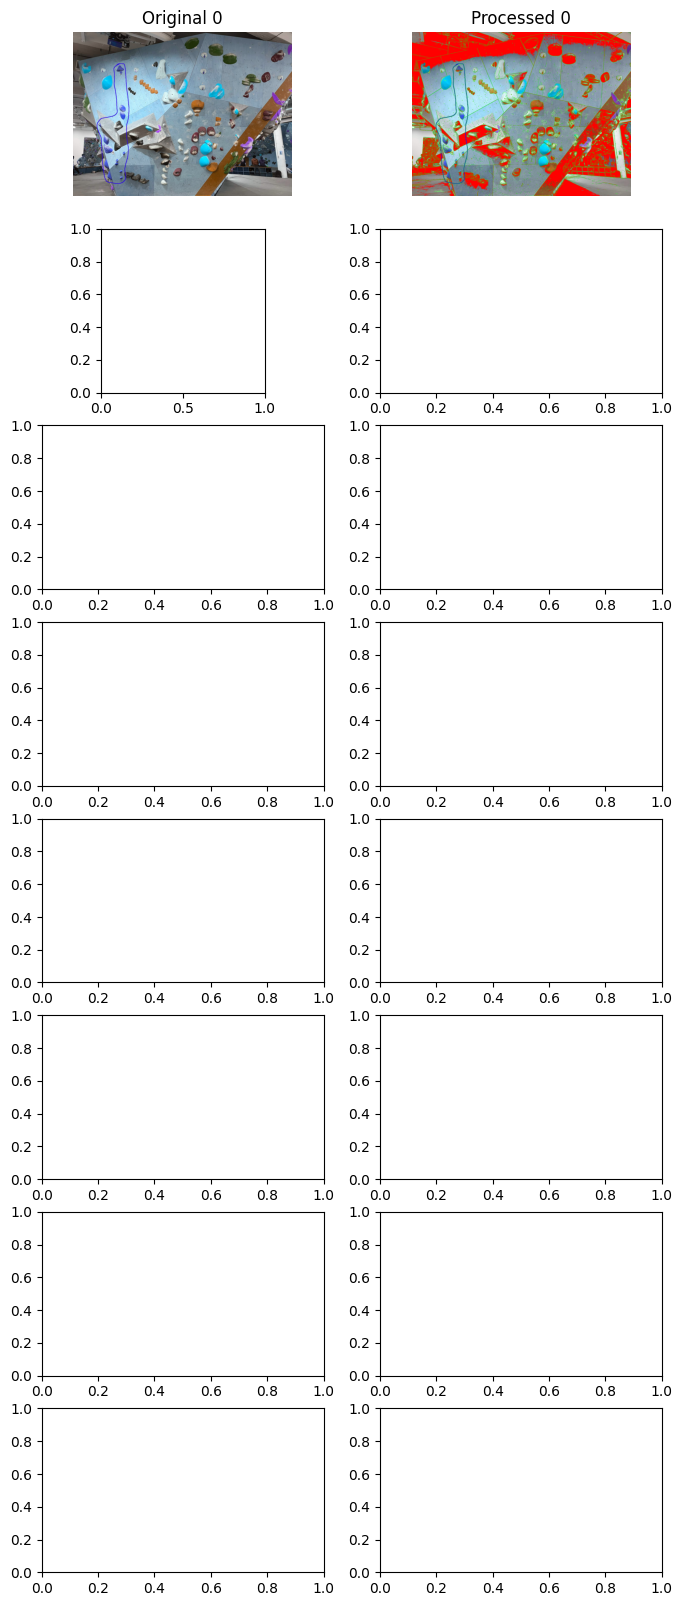

In [12]:
f, plots = plt.subplots(8, 2, figsize=(8,20))  
    # plots[0].imshow(cv2.imread('data/V0/1.jpg'))
    # plots[1].imshow(pic) 
for i in range(8):
    %cd ..
    print(os.getcwd())
    print("File exists:", os.path.isfile('data/V0/1.jpg'))
    plots[i, 0].imshow(cv2.imread(f'./data/V{i}/1.jpg'))
    plots[i, 0].axis('off')
    plots[i, 0].set_title(f'Original {i}')

    plots[i, 1].imshow(detect_hold(f'data/V{i}/1.jpg'))  # Assuming pic_list contains 10 processed images
    plots[i, 1].axis('off')
    plots[i, 1].set_title(f'Processed {i}')

plt.show()